# Exercise #5 - TensorFlow

Now that we know how a neural network computes a prediction and how it can be trained, we can look at how you can achieve this with a deep learning framework.

We will take a look at [TensorFlow](https://www.tensorflow.org/) and we will use it to create a neural network model that can classify images with handwritten digits (0-9).

First we need to import the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Dataset

The dataset we are going to use is the [MNIST dataset](https://www.tensorflow.org/datasets/catalog/mnist), which is nicely provided by TensorFlow itself.

In [2]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

You can see that it has 60000 samples for training and 10000 samples for validation.

The inputs (`x`) are gray-scale images of 28 x 28 pixels. A pixel has a value between 0 and 255.

In [3]:
x_train.min(), x_train.max()

(0, 255)

The labels (`y`) are integers between 0 and 9 (inclusive).

In [4]:
y_train.min(), y_train.max()

(0, 9)

Let's take a look at a random example.

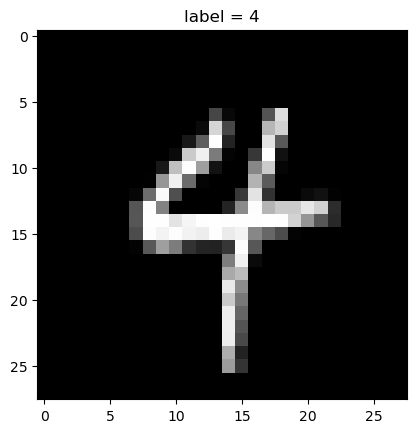

In [5]:
i = np.random.choice(len(x_val))
x = x_val[i]
y_true = y_val[i]

plt.figure()
plt.imshow(x, cmap='gray')
plt.title(f'label = {y_true}')
plt.show()

You should see a pixelated hand drawn digit. Re-run the cell again to see another random sample.

## Model

Now, let's create the neural network model. First we need some classes from TensorFlow.

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

We are going to make a simple sequential model using the [`Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) class which provides a quick way of making a stack of layers. You can simple give it a list with layers and it will stack them together into a model.

    model = Sequential([
        Dense(...),
        Dense(...)])

The stack of layers should transform the input images to probabilities for the 10 digit classes.

The input of the model is a 28x28 pixel image, but the simple layers we have been using so far only accept 1-dimensional samples. So, the first layer we have to add should reshape the input to a 1D vector. This is done using the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) layer class. Create a new instance and set the `input_shape` parameter to `(28,28)`.

Then we want to add two fully connected (i.e. dense) layers of **128** and **64** units. In TensorFlow this is represented by the [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layer class. Create two instances with the correct number of inputs and set the `activation` parameter to `'relu'`.

Finally, add one more dense layer with **10** units that represents the output layer. Set the `activation` parameter to [`'softmax'`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Softmax). This activation function will scale the outputs such that they all sum up to one. In other words, represent a probability distribution.

At the end the structure is summarized.

In [7]:
model = Sequential([
#### BEGIN IMPLEMENTATION ####
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
#### END IMPLEMENTATION ####
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The output should be similar to the following. The names of the layers might be different if you have executed the cell multiple times, and white spaces might differ a little.

    Layer (type)                Output Shape              Param #   
    =================================================================
    flatten (Flatten)           (None, 784)               0         
    dense (Dense)               (None, 128)               100480    
    dense_1 (Dense)             (None, 64)                8256      
    dense_2 (Dense)             (None, 10)                650       
    =================================================================
    Total params: 109386 (427.29 KB)
    Trainable params: 109386 (427.29 KB)
    Non-trainable params: 0 (0.00 Byte)

In order to train the model we have to specify the loss function and the optimizer. This can be done with the `compile` function of the model.

This time we will use the sparse categorical cross entropy loss function ([`'sparse_categorical_crossentropy'`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)) instead of the binary cross entropy loss function we have used before. This function computes the loss for multiple classes (categorical) and for simplicity accepts integers as ground truth, hence the name 'sparse'. The loss function is specified with the `loss` parameter and it accepts string values as well as objects. Use the given string value in this case.

The [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) optimizer (`'adam'`) performs better than the gradient descent method that we have implemented ourselves. This optimizer uses a mechanism called momentum to smoothen the operation. It is the de-facto standard optimizer used today. The optimizer can be specified with the `optimizer` parameter and it also accepts a string or object value.

Finally, the metrics parameter can be set to an array of strings of all the [metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) that should be measured throughout the training process. Set the `metrics` parameter to an array of at least the `'accuracy'` metric.

Call the `compile` method of the model and set the parameters `loss`, `optimizer`,  and `metrics` accordingly. No ouput is expected.

In [8]:
#### BEGIN IMPLEMENTATION ####
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#### END IMPLEMENTATION ####

## Train

Time to train the network. We give it the images as input and the labels as target and let it run for 10 epochs.

The `fit` function of the model will perform the forward propagation, compute the loss, run the backward propagation to get the gradients of the weights, and then call the optimizer to change the parameters accordingly. In other words, the whole training loop we have made ourselves before. It also automatically chops up the input set into batches.

Call the `fit` function of the model. The first two parameters should be the X and Y arrays of the training set to serve as input and ground truth for training. Set the `epochs` parameter to `10`. The fit function can also accept an additional tuple of arrays (`(x, y)`), that can be used to validate the model every epoch. Set the `validation_data` parameter to use the validation dataset. The function will return a result structure that is needed later, so make sure to store the result in the `train_result` variable.

When you run this cell a progress bar will be displayed for every epoch, showing the loss and accuracy of the model on the training set during the epoch, as well as the loss and accuracy of the model on the validation set at the end of the epoch.

In [9]:
#### BEGIN IMPLEMENTATION ####
train_result = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)
#### END IMPLEMENTATION ####

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4721 - accuracy: 0.8307 - val_loss: 0.4269 - val_accuracy: 0.8953
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3145 - accuracy: 0.9170 - val_loss: 0.2738 - val_accuracy: 0.9335
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2185 - accuracy: 0.9395 - val_loss: 0.2109 - val_accuracy: 0.9424
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1656 - accuracy: 0.9526 - val_loss: 0.2020 - val_accuracy: 0.9516
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1344 - accuracy: 0.9611 - val_loss: 0.2033 - val_accuracy: 0.9517
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1278 - accuracy: 0.9635 - val_loss: 0.1723 - val_accuracy: 0.9570
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1163 - accuracy: 0.9667 - val_loss: 0.1404 - val_accuracy:

The result structure returned by the `fit` method contains a lot of information. For instnace, it contains a history of the training and validation loss for each epoch. It represents the same data as was logged above. Let's plot this to see the training progress.

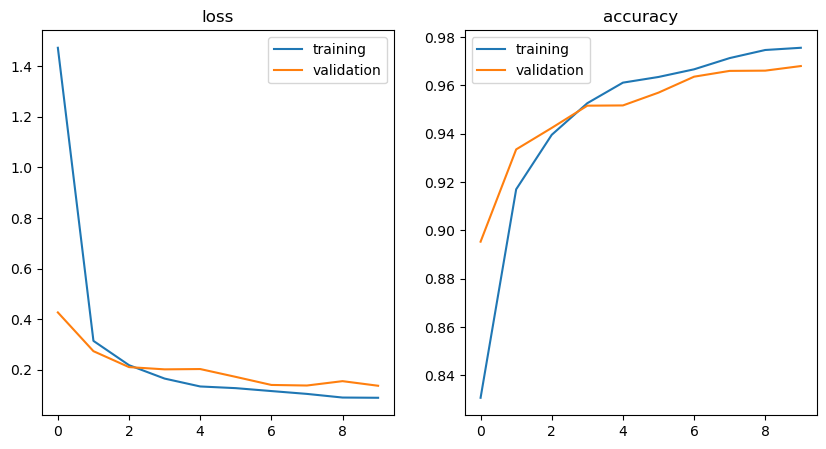

In [10]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title('loss')
ax1.plot(train_result.history['loss'], label='training')
ax1.plot(train_result.history['val_loss'], label='validation')
ax1.legend()

ax2.set_title('accuracy')
ax2.plot(train_result.history['accuracy'], label='training')
ax2.plot(train_result.history['val_accuracy'], label='validation')
ax2.legend()


You should see that the loss went down quickly during the first epoch and the accuracy was already quite high after that (>90%). The loss only went down a little more during the remaining epochs and the accuracy increased a little as well.

Time to evaluate the model manually.

## Evaluation

Let's take a random sample from the validation set and see how well it performs.

Let's first create a simple helper function that displays the input image, predict the label using the model, display the probabilities of all categories and finally shows if the prediction was correct.

In [11]:
def show_and_predict(i):
    x = x_val[[i]]
    y_true = y_val[i]

    plt.figure()
    plt.imshow(x[0], cmap='gray')
    plt.title(f'label = {str(y_true)}')
    plt.show()

    y_preds = model(x)[0]
    for i, p in enumerate(y_preds):
        print(f'#{i}: {p:.1f}')
    y_pred = np.argmax(y_preds)
    ok = 'OK' if y_pred == y_true else 'NOT OK'
    print(f'prediction {y_pred} => {ok}')

Let's see a random sample of the validation set. It should predict it correctly in most cases. Now and then it will give the wrong result. Run the cell multiple times to see multiple samples.

1452


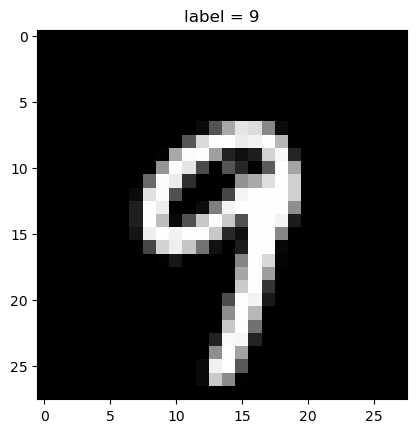

#0: 0.0
#1: 0.0
#2: 0.0
#3: 0.0
#4: 0.0
#5: 0.0
#6: 0.0
#7: 0.0
#8: 0.0
#9: 1.0
prediction 9 => OK


In [12]:
i = np.random.choice(len(x_val))
print(i)
show_and_predict(i)

Some cases are not so very clear, even for humans.

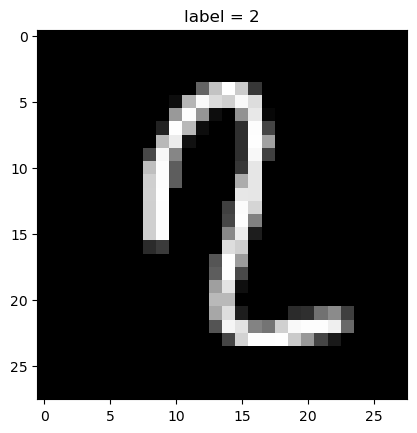

#0: 0.0
#1: 0.0
#2: 0.0
#3: 0.0
#4: 0.0
#5: 0.1
#6: 0.0
#7: 0.0
#8: 0.8
#9: 0.0
prediction 8 => NOT OK


In [13]:
show_and_predict(4248) # a 2 that is not so clearly drawn

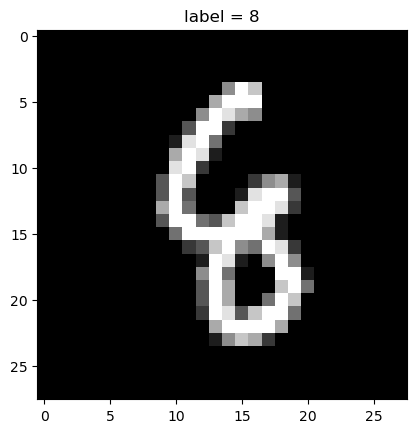

#0: 0.0
#1: 0.0
#2: 0.0
#3: 0.0
#4: 0.0
#5: 0.0
#6: 0.9
#7: 0.0
#8: 0.0
#9: 0.0
prediction 6 => NOT OK


In [14]:
show_and_predict(4879) # an 'open' 8

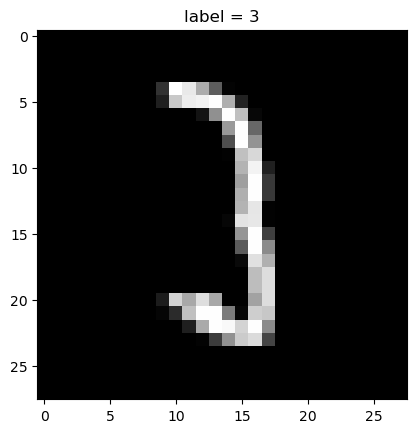

#0: 0.0
#1: 0.0
#2: 0.0
#3: 1.0
#4: 0.0
#5: 0.0
#6: 0.0
#7: 0.0
#8: 0.0
#9: 0.0
prediction 3 => OK


In [15]:
show_and_predict(4443) # a 3 that is not so clearly drawn

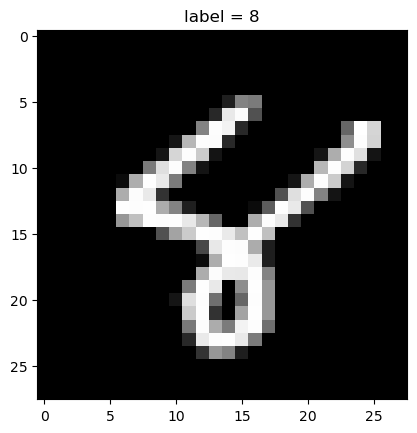

#0: 0.0
#1: 0.0
#2: 0.0
#3: 0.0
#4: 0.0
#5: 0.0
#6: 0.0
#7: 0.0
#8: 1.0
#9: 0.0
prediction 8 => OK


In [16]:
show_and_predict(5176) # an 8 that could be a 4

## End

This wraps up the end of these exercises.

This last one showed that it is quite easy to create a neural network model using a framework like TensorFlow. Surprisingly, the model does quite well in such a short time of training. However, we have to admit that this dataset is quite simple; the images are (very) small and nicely pre-processed to make the digits clearly visible. For larger and more complex datasets, like ImageNet, these small neural networks will not suffice anymore. That is why it is called *Deep Learning*. The power of neural networks begins to show when the models become larger and deeper.

Have fun learning!